<a href="https://colab.research.google.com/github/JoshuaBarsky/Math-152/blob/main/Classwork_3_9_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import numpy as np
from PIL import Image

Order. Chaos.

Determinism.  Unpredictability.

Individuals.  Collective.

..Iteration.

**Complex Number**

$\mathbb{C}$ = $\mathbb{R}$ + $\mathbb{R}j$

In [46]:
z = 1+2j
z*z

(-3+4j)

In [62]:
def stay_bounded(c):
  for i in range(1000):
    c = (c**2)+c
    if c > 10:
      return False
    else:
      continue
  return True

In [61]:
print(stay_bounded(.001))

0.19313676042983857
True


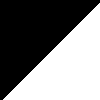

In [56]:
x = np.arange(-50,50)
y = np.arange(-50,50)
xy = np.add.outer(x,y)

bool_arr = (xy >= 2)

image = Image.fromarray(bool_arr)
image.show() 

Solution

In [166]:
re_array = np.linspace(-2,2,400)
im_array = np.linspace(-1,1,200)

c_array = np.add.outer(re_array, im_array*1j)

In [167]:
def make_mandel(num_iter=100):
  arr = np.zeros(c_array.shape) #keeps track of numbers
  b_arr = np.zeros(c_array.shape) #keeps track of boundedness
  for t in range(num_iter):
    arr = (arr**2)+c_array #complex numbers
    arr_size = np.abs(arr) #floats
    is_bded = (arr_size < 2) #boolean
    b_arr = b_arr + is_bded
    arr = (arr * is_bded) + (2*(1-is_bded))
  return is_bded

$f$: x ↦ x if |x|$\le$2, 2 if |x|$>$2 

In [168]:
mbrot = make_mandel()


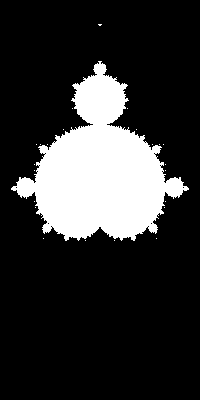

In [169]:
img = Image.fromarray(mbrot)
display(img)

In [188]:
def make_mandel2(num_iter=100):
  arr = np.zeros(c_array.shape) #keeps track of numbers
  b_arr = np.zeros(c_array.shape) #keeps track of boundedness
  for t in range(num_iter): #loop must be used for this type of dynamical approach
    arr = (arr**2)+c_array #complex numbers
    arr_size = np.abs(arr) #floats
    is_bded = (arr_size < 2) #boolean
    b_arr = b_arr + is_bded
    arr = (arr * is_bded) + (2*(1-is_bded))
  return b_arr, is_bded


In [189]:
esc_time, mbrot = make_mandel2()

In [190]:
pixels = np.zeros((c_array.shape[0], c_array.shape[1], 3))

In [191]:
pixels[:,:,0] = mbrot*255
pixels[:,:,1] = mbrot*255
pixels[:,:,2] = mbrot*255
pixels[:,:,0] += (100*esc_time%255)
pixels[:,:,1] += (37*esc_time%255)
pixels = np.clip(pixels,0,255)

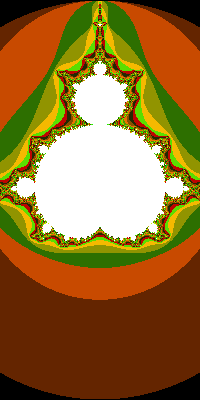

In [192]:
im = Image.fromarray(pixels.astype(np.uint8))
display(im)

Newton's Method brings cool fractals as well.

###**Random walks**

In [195]:
num_bots = 100000
bots = np.zeros((num_bots, 2))
bots[0] #location of bots

array([0., 0.])

In [198]:
for t in range(1000):
  step = np.random.uniform(-1,1,(num_bots,2))
  bots = bots+step

In [200]:
bots[0]

array([ 4.43595754, -7.84319547])

In [207]:
counts = np.histogram2d(bots[:,0], bots[:,1], bins = 300)[0]

In [216]:
cmax = np.max(counts)
pixels = (counts*255/cmax)
pixels = pixels.astype(np.uint8)

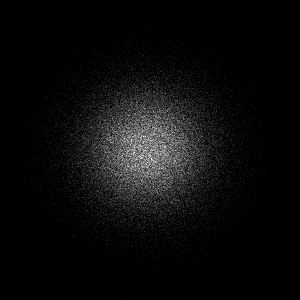

In [217]:
img_bots = Image.fromarray(pixels)
display(img_bots)

###**Remember for the project: break up into code blocks.**